In [23]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# Common imports
import numpy as np
import pandas as pd
import os
import sklearn
from sklearn.model_selection import train_test_split
from numpy import linalg as LA
# to make this notebook's output stable across runs
np.random.seed(1)

import math
# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)



In [24]:
#Data1
#class1_D1
# mean1=[1,1]
# cov1=[[0.25 , 0],[0,0.25]]
# c1=np.random.multivariate_normal(1, cov1, 1000)
#class2_D1
# mean2=[-1,-1]
# cov2=[[0.25 , 0],[0,0.25]]
# c2=np.random.multivariate_normal(mean2, cov2, 10)





c1=np.random.normal(1,0.5,(1000,2))
c2=np.random.normal(-1, 0.5, (10,2))

# ##Coment this part to run fig2

a1=np.full((1000,1), 1)
b1=np.full((10,1), -1)
x1_train=np.concatenate((c1[:,0], c2[:,0]), axis=0)
x2_train=np.concatenate((c1[:,1], c2[:,1]), axis=0)
z1_train=np.concatenate((a1, b1), axis=None)




#Data2
#class1_D2
# mean3=[1,1]
# cov3=[[0.5 , 0],[0,0.5]]
# g1=np.random.multivariate_normal(mean3, cov3, 100)

## class2_D2
## mean4=[-1,-1]
## cov4=[[0.25 , 0],[0,0.25]]
## g2=np.random.multivariate_normal(mean4, cov4, 100)


##Coment this part to run fig1
# g1=np.random.normal(1, 0.5, (100,2))
# g2=np.random.normal(-1, 0.5, (100,2))
# a2=np.full((100,1), 1)
# b2=np.full((100,1), -1)
# z1_train=np.concatenate((a2, b2), axis=None)
# x1_train=np.concatenate((g1[:,0], g2[:,0]), axis=0)
# x2_train=np.concatenate((g1[:,1], g2[:,1]), axis=0)

In [25]:
# plt.scatter(c1[:,0], c1[:,1],color='r',marker='x')
# plt.scatter(c2[:,0], c2[:,1],color='b',marker='o')

# plt.xlabel("$x1$", fontsize=18)
# plt.ylabel("$x2$", rotation=0, fontsize=18)    
# plt.show()

In [26]:
# plt.scatter(g1[:,0], g1[:,1],color='r',marker='x')
# plt.scatter(g2[:,0], g2[:,1],color='b',marker='o')
# plt.xlabel("$x1$", fontsize=18)
# plt.ylabel("$x2$", rotation=0, fontsize=18)    
# plt.show()

# Original Algorithm 


In [27]:
Alpha=0.1 #change
#Initialization
b_curr=0.1 #changed
w1_curr=0.1
w2_curr=0.1
b_next=1 #changed
w1_next=1
w2_next=1
epoch=0
flag=1
h=np.zeros(len(z1_train))
#while(epoch!=10):
# while(epoch!=10 or flag==1):
while(flag==1 and epoch<=50):
    #epoch=epoch+1
    #print(epoch)
    for j in range(len(z1_train)):
        net=w1_curr*x1_train[j]+w2_curr*x2_train[j]+b_curr
        if (net >= 0 ):  
            h[j] =1
        elif (net < 0) :  
            h[j] = -1
        #Updating rules            
        if (h[j]-z1_train[j]!=0):
            w1_next=w1_curr+Alpha*(z1_train[j]-net)*x1_train[j]
            w2_next=w2_curr+Alpha*(z1_train[j]-net)*x2_train[j]      
            b_next=b_curr+Alpha*(z1_train[j]-net)
            Error_weights=[w1_next-w1_curr,w2_next-w2_curr,b_next-b_curr ]
            w1_curr=w1_next.copy()     
            w2_curr=w2_next.copy() 
            b_curr=b_next.copy()
            if (abs(max(Error_weights))>=0.1):
                print(epoch,j)
#                 w1_curr=w1_next.copy()   
#                 w2_curr=w2_next.copy() 
#                 b_curr=b_next.copy()  
            else :
                flag=0
                break                
    epoch=epoch+1
    #print(max(Error_weights))
w1,w2,b=w1_next,w2_next,b_next
w1,w2,b,max(Error_weights)

(1, 1, 1, -0.024721912939064172)

# Revised algorithm

In [28]:
# Alpha=0.1 #change
# #Initialization
# b_curr=0.1 #changed
# w1_curr=0.1
# w2_curr=0.1
# b_next=1 #changed
# w1_next=1
# w2_next=1
# epoch=0
# flag=1
# h=np.zeros(len(z1_train))
# #while(epoch!=10):
# # while(epoch!=10 or flag==1):
# while(flag==1 and epoch<=50):
#     #print(epoch)
#     for j in range(len(z1_train)):
#         net=w1_curr*x1_train[j]+w2_curr*x2_train[j]+b_curr
#         if (math.tanh(net) >= 0 ):  
#             h[j] = 1
#         elif (math.tanh(net) < 0) :  
#             h[j] = -1
#         #Updating rules            
#         if (h[j]-z1_train[j]!=0):
#             w1_next=w1_curr+Alpha*(z1_train[j]-net)*x1_train[j]
#             w2_next=w2_curr+Alpha*(z1_train[j]-net)*x2_train[j]      
#             b_next=b_curr+Alpha*(z1_train[j]-net)
#             Error_weights=[w1_next-w1_curr,w2_next-w2_curr,b_next-b_curr ]
#             w1_curr=w1_next.copy()     
#             w2_curr=w2_next.copy() 
#             b_curr=b_next.copy()
#             if (abs(max(Error_weights))>=0.1):
#                 print(epoch,j)
# #                 w1_curr=w1_next.copy()   
# #                 w2_curr=w2_next.copy() 
# #                 b_curr=b_next.copy()  
#             else :
#                 flag=0
#                 break                
#     epoch=epoch+1
#     #print(max(Error_weights))
# w1,w2,b=w1_next,w2_next,b_next
# w1,w2,b,max(Error_weights)

# Figure 1

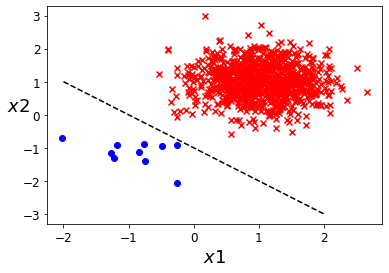

In [29]:
xx=np.linspace(-2,2)
yy1=-(w1/w2) * xx-(b/w2)
plt.plot(xx, yy1, "k--")
for i in range(len(z1_train)):
    if z1_train[i]==1:
        plt.scatter(x1_train[i], x2_train[i],color='r',marker='x')
    else: 
        plt.scatter(x1_train[i], x2_train[i],color='b',marker='o')
    plt.xlabel("$x1$", fontsize=18)
    plt.ylabel("$x2$", rotation=0, fontsize=18)
plt.show()
